In [1]:
!pip install torch==1.13.1+cu117 torchvision==0.14.1+cu117 torchaudio==0.13.1 --extra-index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu117
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 GB 420.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.3/24.3 MB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 91.2 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.1+cu118
    Uninstalling torch-2.0.1+cu118:
      Successfully uninstalled torch-2.0.1+cu118
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.15.2+cu118
    Uninstalling torchvision-0.15.2+cu118:
      Successfully uninstalled torchvision-0.15.2+cu118
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.0.2+cu118
    Uninstalling torchaudio-2.0.2+cu118:
      Successfully uninstalled torchaudio-2.0.2+cu118
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the so

In [2]:
!pip install torchdata==0.5.1 torchtext==0.14.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 87.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 92.0 MB/s eta 0:00:00
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.15.2
    Uninstalling torchtext-0.15.2:
      Successfully uninstalled torchtext-0.15.2
  Attempting uninstall: torchdata
    Found existing installation: torchdata 0.6.1
    Uninstalling torchdata-0.6.1:
      Successfully uninstalled torchdata-0.6.1


In [3]:
!pip install torch-scatter -f https://data.pyg.org/whl/torch-1.13.1+cu117.html

Looking in links: https://data.pyg.org/whl/torch-1.13.1+cu117.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 63.7 MB/s eta 0:00:00


In [4]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 kB 31.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch_geometric: filename=torch_geometric-2.3.1-py3-none-any.whl size=910459 sha256=b3260efe3a9d355777b4f3bb2ea0bd420f43076bc1de64e7ef7edb79b8ec3872
  Stored in directory: /root/.cache/pip/wheels/ac/dc/30/e2874821ff308ee67dcd7a66dbde912411e19e35a1addda028
Successfully built torch_geometric


In [1]:
from torch_geometric.nn import GCNConv
import numpy as np
import pandas as pd
import torch
from torch_geometric.data import Data
import torch.nn.functional as F
from torch_geometric.nn import GCNConv,GATv2Conv
from torch_scatter import scatter_mean
from torch_geometric.data import InMemoryDataset, download_url, extract_zip
from torch_geometric.nn import MetaLayer

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
device = torch.device("cuda" if torch.cuda.is_available()  else "cpu" )
device

device(type='cuda')

In [3]:
def get_int_map(dep):
    dep = df.loc[df["deployment"]==dep]
    dep = dep.reset_index(drop=True)
    return dep

In [8]:
# t1 = get_int_map(100)

In [8]:
df = pd.read_csv("../TPML-WLAN-GAT/required_format_v1.csv")

In [9]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,primary_channel,min_channel_allowed,max_channel_allowed,rssi,node_type,sinr,airtime_mean,deployment,channel_bonding_model,throughput
0,0,0.0,-79.34,-103.96,-119.98,-82.35,-94.85,-111.61,-122.95,-103.96,...,4,4,5,-57.69,0,36.28,95.745,0.0,4,111.77
1,1,0.0,-79.34,-103.96,-119.98,-82.35,-94.85,-111.61,-122.95,-103.96,...,4,4,5,-65.37,1,29.36,95.745,0.0,4,5.79
2,2,0.0,-79.34,-103.96,-119.98,-82.35,-94.85,-111.61,-122.95,-103.96,...,4,4,5,-65.35,1,29.48,95.745,0.0,4,6.11
3,3,0.0,-79.34,-103.96,-119.98,-82.35,-94.85,-111.61,-122.95,-103.96,...,4,4,5,-61.41,1,31.97,95.745,0.0,4,6.91
4,4,0.0,-79.34,-103.96,-119.98,-82.35,-94.85,-111.61,-122.95,-103.96,...,4,4,5,-63.52,1,31.26,95.745,0.0,4,9.99


In [10]:
df.shape[0]

78078

In [11]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [103]:
# Creating individual graphs
# This assumes all APs and STAs are connected to each other
def create_graph(split,split_y,deployment):
    dep = get_int_map(deployment)
    dep_y = dep["throughput"]
    dep_x = dep[['0', '1', '2', '3', '4', '5', '6', '7','8', '9', '10', '11', 'wlan_code_index', 'x(m)', 'y(m)',
            'primary_channel', 'min_channel_allowed', 'max_channel_allowed', 'rssi', 'node_type',
            'sinr', 'airtime_mean', 'deployment']]
    #print(dep_x)
    dep_reset = dep.reset_index(drop=True)
    ap_index = {}
    out = dep_reset[dep_reset["node_type"] == 0]
    for i in range(len(out)):
        ap_index[out.index[i]] = i
    #print(ap_index)
    node_features = dep_x.iloc[:,12:].values
    # print(node_features)
    #edge_features = dep.iloc[:,:12].values - here each node has been given an edge feature
    # need to give each edge an edge feature
    node_targets = dep_y.values
    node_features = torch.tensor(node_features, dtype=torch.float)
    print(node_features.shape)
    #edge_features = torch.tensor(edge_features, dtype=torch.float)
    node_targets = torch.tensor(node_targets, dtype=torch.float)
    # Add edges here for each deployment
    edges = []
    edge_features = []
    edge_index = []
    for i in range(len(dep)):
        for j in range(len(dep)):
            if (i != j and (dep["node_type"].iloc[i] == 0 and dep["node_type"].iloc[j] == 0)) or (i !=j and (dep["node_type"].iloc[i] == 1 and dep["node_type"].iloc[j] == 0)):
                edges.append([i,j])
    #print(edges)
    edges2=edges
    edges = torch.tensor(edges, dtype=torch.float)
    #print("Edges: ", edges, edges.shape)
    # edge_index = torch.tensor(edges, dtype=torch.long)
    edge_index = torch.tensor(edges,dtype=torch.long)
    edge_index = edge_index.t().contiguous()
    #print(edges.detach(), edges.shape)
    print(edges.shape[0])
    for i in range(edges.shape[0]):
        # print(dep.iloc[int(edges[i][0]), ap_index[int(edges[i][1])]])
        i_pos = np.asarray([dep.at[edges2[i][0],"x(m)"],dep.at[edges2[i][0],"y(m)"]])
        j_pos = np.asarray([dep.at[edges2[i][1],"x(m)"],dep.at[edges2[i][1],"y(m)"]])
        distance = np.linalg.norm(i_pos - j_pos)
        #print(i)
        # edge_features.append([distance,dep.iloc[int(edges[i][0]), ap_index[int(edges[i][1])]]])
        edge_type = 0
        if int(edges2[i][0]) in ap_index.keys():
          edge_type = 0
        else:
          edge_type = 1
        edge_features.append([dep.iloc[int(edges[i][0]), ap_index[int(edges[i][1])]],distance])
    # edge_features = np.array(edge_features)
    # print(edge_features)
    edge_features = torch.tensor(edge_features, dtype=torch.float)
    #print(edge_features, edge_features.shape)
    graph = {
        "edges": edges,
        "edge_index": edge_index,
        "node_features": node_features,
        "edge_features": edge_features,
        "node_targets": node_targets
    }
#     print("*"*10)
#     print(edges.shape)
#     print(edge_index.shape)
#     print(node_features.shape)
#     print(edge_features.shape)
#     print(node_targets.shape)
    return graph

In [104]:
create_graph(0,0,0)

torch.Size([177, 11])
2112


{'edges': tensor([[  0.,  15.],
         [  0.,  27.],
         [  0.,  45.],
         ...,
         [176., 135.],
         [176., 150.],
         [176., 163.]]),
 'edge_index': tensor([[  0,   0,   0,  ..., 176, 176, 176],
         [ 15,  27,  45,  ..., 135, 150, 163]]),
 'node_features': tensor([[0.0000e+00, 1.0000e+01, 1.0000e+01,  ..., 3.6280e+01, 9.5745e+01,
          0.0000e+00],
         [0.0000e+00, 7.1300e-02, 1.0808e+01,  ..., 2.9360e+01, 9.5745e+01,
          0.0000e+00],
         [0.0000e+00, 1.9627e+00, 4.1427e+00,  ..., 2.9480e+01, 9.5745e+01,
          0.0000e+00],
         ...,
         [1.1000e+01, 6.6595e+01, 5.5642e+01,  ..., 3.5400e+01, 9.4855e+01,
          0.0000e+00],
         [1.1000e+01, 6.3075e+01, 4.3863e+01,  ..., 2.9680e+01, 9.4855e+01,
          0.0000e+00],
         [1.1000e+01, 6.8264e+01, 5.0447e+01,  ..., 5.0690e+01, 9.4855e+01,
          0.0000e+00]]),
 'edge_features': tensor([[   0.0000,   20.0000],
         [ -79.3400,   40.0000],
         [-103.96

In [105]:
def create_geometric_graph(graph):
    data = Data(
        # Input graph.
        x=graph["node_features"],
        #pos=pos,
        edge_index=graph["edge_index"],
        edge_attr=graph["edge_features"],
        # Output node targets.
        y=graph["node_targets"],
        num_nodes = len(graph["node_features"])

    )

    return data

In [106]:
print(create_geometric_graph(create_graph(0,0,0)))

torch.Size([177, 11])
2112
Data(x=[177, 11], edge_index=[2, 2112], edge_attr=[2112, 2], y=[177], num_nodes=177)


In [16]:
!rm -r ../TPML-WLAN-GAT/train
!rm -r ../TPML-WLAN-GAT/valid
!rm -r ../TPML-WLAN-GAT/test

'rm' is not recognized as an internal or external command,
operable program or batch file.
'rm' is not recognized as an internal or external command,
operable program or batch file.


'rm' is not recognized as an internal or external command,
operable program or batch file.


In [107]:
# With train, validation and test data.
import random
import os
from torch_geometric.data import InMemoryDataset, download_url, extract_zip
# divide into training and testing points
class CustomDataset(InMemoryDataset):
    def __init__(self, split="train", transform=None):
        self.data = pd.read_csv("../TPML-WLAN-GAT/required_format_v1.csv")
        self.split = split
        super(CustomDataset, self).__init__( split, transform)
        #self.data, self.slices = torch.load(self.processed_paths[0])
        #self.data = pd.read_csv("deployment_with_int_map.csv")
        #self.data, self.slices = pd.read_csv("deployment_with_int_map.csv")

        # print("In init")

    @property
    def raw_file_names(self):
        # print("In raw_file_names")
        return ["../TPML-WLAN-GAT/required_format_v1.csv"]

    @property
    def processed_file_names(self):
        # print("In processed_file_names")
        li = ['data_train_' + str(i) + '.pt' for i in range(360)]+ ['data_valid_' + str(j) + '.pt' for j in range(360, 480)] + ['data_test_' + str(k) + '.pt' for k in range(480, 600)]
        #print(li)
        return ['data_train_' + str(i) + '.pt' for i in range(360)]+ ['data_valid_' + str(j) + '.pt' for j in range(360,480)] + ['data_test_' + str(k) + '.pt' for k in range(480,600)]

    def _download(self):
        '''
        print("In download")
        path = download_url(self.url, self.raw_dir)
        extract_zip(path, self.raw_dir)
        # The zip file is removed
        os.unlink(path)
        '''
        pass

    def process(self):
        print("In process")
        #df = pd.read_csv(self.raw_paths[0])
        X = self.data[['0', '1', '2', '3', '4', '5', '6', '7','8', '9', '10', '11', 'wlan_code_index', 'x(m)', 'y(m)',
            'primary_channel', 'min_channel_allowed', 'max_channel_allowed', 'node_type','rssi',
            'sinr', 'airtime_mean','deployment']]
        y = self.data.loc[:, ["throughput", "deployment"]]
#         X_train = X.iloc[:183854, :]
#         X_valid = X.iloc[183854:245139, :]
#         X_test = X.iloc[245139:,:]
#         print(X_test.columns)
#         y_train = y.iloc[:183854, :]
#         y_valid = y.iloc[183854:245139, :]
#         y_test = y.iloc[245139:,:]
        graphs = []
        # print("Here")
        l = [i for i in range(600)]
        self.l_train = random.sample(l, 360)
        l = [x for x in l if x not in self.l_train]
        self.l_valid = random.sample(l, 120)
        l = [x for x in l if x not in self.l_valid]
        self.l_test = l
        count = 0
        if(self.split == "train"):

            for i in self.l_train:

                #X_train = torch.tensor(X_train.to_numpy(), dtype=torch.float)
                #y_train = torch.tensor(y_train.to_numpy(), dtype=torch.float)
                graph = create_graph(X, y, i)

                graph = create_geometric_graph(graph)
                graphs.append(graph)

                torch.save(graph, os.path.join(self.processed_dir, f'data_train_{count}.pt'))
                count += 1
        elif(self.split == "valid"):
            for i in self.l_valid:
                #X_test = torch.tensor(X_test.to_numpy(), dtype=torch.float)
                #y_test = torch.tensor(y_test.to_numpy(), dtype=torch.float)
                graph = create_graph(X, y, i)
                graph = create_geometric_graph(graph)
                graphs.append(graph)

                torch.save(graph, os.path.join(self.processed_dir, f'data_valid_{count}.pt'))
                count += 1
        else:
            for i in self.l_test:
                #X_test = torch.tensor(X_test.to_numpy(), dtype=torch.float)
                #y_test = torch.tensor(y_test.to_numpy(), dtype=torch.float)
                graph = create_graph(X, y, i)
                graph = create_geometric_graph(graph)
                graphs.append(graph)

                torch.save(graph, os.path.join(self.processed_dir, f'data_test_{count}.pt'))
                count += 1
        #return graphs[idx]

    def __len__(self):
        if(self.split == "train"):
            #return len(self.processed_file_names[0])
            return 360
        elif self.split == "valid":
            return 120
        else:
            return 120

    def __getitem__(self, idx):
        #print("Part: ", self.processed_file_names[1])

        if(self.split == "train"):
            data = torch.load(os.path.join(self.processed_dir, f'data_train_{idx}.pt'))
        elif(self.split == "valid"):
            data = torch.load(os.path.join(self.processed_dir, f'data_valid_{idx}.pt'))
        elif (self.split=="test"):
            data = torch.load(os.path.join(self.processed_dir, f'data_test_{idx}.pt'))
        return data

In [108]:
dataset_train = CustomDataset( split='train')
dataset_valid = CustomDataset( split='valid')
dataset_test = CustomDataset( split='test')

Processing...


In process
torch.Size([72, 11])
568
torch.Size([64, 11])
504
torch.Size([72, 11])
568
torch.Size([180, 11])
2148
torch.Size([202, 11])
2412
torch.Size([202, 11])
2412
torch.Size([178, 11])
2124
torch.Size([194, 11])
2316
torch.Size([74, 11])
584
torch.Size([64, 11])
504
torch.Size([73, 11])
576
torch.Size([70, 11])
552
torch.Size([71, 11])
560
torch.Size([187, 11])
2232
torch.Size([73, 11])
576
torch.Size([176, 11])
2100
torch.Size([196, 11])
2340
torch.Size([188, 11])
2244
torch.Size([196, 11])
2340
torch.Size([190, 11])
2268
torch.Size([66, 11])
520
torch.Size([191, 11])
2280
torch.Size([66, 11])
520
torch.Size([184, 11])
2196
torch.Size([193, 11])
2304
torch.Size([72, 11])
568
torch.Size([60, 11])
472
torch.Size([69, 11])
544
torch.Size([65, 11])
512
torch.Size([66, 11])
520
torch.Size([74, 11])
584
torch.Size([200, 11])
2388
torch.Size([198, 11])
2364
torch.Size([170, 11])
2028
torch.Size([76, 11])
600
torch.Size([193, 11])
2304
torch.Size([78, 11])
616
torch.Size([191, 11])
2280
t

Done!
Processing...


In process
torch.Size([199, 11])
2376
torch.Size([62, 11])
488
torch.Size([68, 11])
536
torch.Size([65, 11])
512
torch.Size([206, 11])
2460
torch.Size([200, 11])
2388
torch.Size([177, 11])
2112
torch.Size([180, 11])
2148
torch.Size([199, 11])
2376
torch.Size([63, 11])
496
torch.Size([65, 11])
512
torch.Size([193, 11])
2304
torch.Size([73, 11])
576
torch.Size([203, 11])
2424
torch.Size([202, 11])
2412
torch.Size([168, 11])
2004
torch.Size([74, 11])
584
torch.Size([74, 11])
584
torch.Size([179, 11])
2136
torch.Size([70, 11])
552
torch.Size([180, 11])
2148
torch.Size([182, 11])
2172
torch.Size([205, 11])
2448
torch.Size([73, 11])
576
torch.Size([187, 11])
2232
torch.Size([62, 11])
488
torch.Size([194, 11])
2316
torch.Size([178, 11])
2124
torch.Size([198, 11])
2364
torch.Size([71, 11])
560
torch.Size([193, 11])
2304
torch.Size([66, 11])
520
torch.Size([74, 11])
584
torch.Size([70, 11])
552
torch.Size([77, 11])
608
torch.Size([67, 11])
528
torch.Size([224, 11])
2676
torch.Size([204, 11])
24

Done!
Processing...


In process
torch.Size([169, 11])
2016
torch.Size([224, 11])
2676
torch.Size([168, 11])
2004
torch.Size([192, 11])
2292
torch.Size([186, 11])
2220
torch.Size([183, 11])
2184
torch.Size([195, 11])
2328
torch.Size([183, 11])
2184
torch.Size([203, 11])
2424
torch.Size([185, 11])
2208
torch.Size([217, 11])
2592
torch.Size([175, 11])
2088
torch.Size([177, 11])
2112
torch.Size([215, 11])
2568
torch.Size([181, 11])
2160
torch.Size([198, 11])
2364
torch.Size([181, 11])
2160
torch.Size([192, 11])
2292
torch.Size([186, 11])
2220
torch.Size([189, 11])
2256
torch.Size([196, 11])
2340
torch.Size([185, 11])
2208
torch.Size([182, 11])
2172
torch.Size([199, 11])
2376
torch.Size([190, 11])
2268
torch.Size([203, 11])
2424
torch.Size([179, 11])
2136
torch.Size([216, 11])
2580
torch.Size([207, 11])
2472
torch.Size([203, 11])
2424
torch.Size([207, 11])
2472
torch.Size([209, 11])
2496
torch.Size([197, 11])
2352
torch.Size([194, 11])
2316
torch.Size([189, 11])
2256
torch.Size([200, 11])
2388
torch.Size([194, 

Done!


# MODS TO MODEL START HERE

In [114]:
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_scatter import scatter_mean
from torch_geometric.nn import MetaLayer

class EdgeModel(torch.nn.Module):
    def __init__(self, n_node_features, n_edge_features, hiddens, n_targets):
        super().__init__()
        self.edge_mlp = torch.nn.Sequential(
            torch.nn.Linear(2 * n_node_features + n_edge_features, hiddens),
            torch.nn.LeakyReLU(),
            torch.nn.Linear(hiddens, n_targets),
        )

    def forward(self, src, dest, edge_attr, u=None, batch=None):
        out = torch.cat([src, dest, edge_attr], 1)
        out = self.edge_mlp(out)
        return out


class NodeModel(torch.nn.Module):
    def __init__(self, n_node_features, hiddens, n_targets):
        super(NodeModel, self).__init__()
        self.node_mlp_1 = torch.nn.Sequential(
            torch.nn.Linear(n_node_features + hiddens, hiddens),
            torch.nn.LeakyReLU(),
            torch.nn.Linear(hiddens, hiddens),
        )
        self.node_mlp_2 = torch.nn.Sequential(
            torch.nn.Linear(n_node_features + hiddens, hiddens),
            torch.nn.LeakyReLU(),
            torch.nn.Linear(hiddens, n_targets),
        )

    def forward(self, x, edge_index, edge_attr, u, batch):
        #print("In node model")
        row, col = edge_index
        out = torch.cat([x[col], edge_attr], dim=1)
        out = self.node_mlp_1(out)
        out = scatter_mean(out, row, dim=0, dim_size=x.size(0))
        out = torch.cat([x, out], dim=1)
        out = self.node_mlp_2(out)
        #print("Exit node model")
        return out

class MetaNet(torch.nn.Module):
    def __init__(self, n_node_features, n_edge_features, num_hidden):
        super(MetaNet, self).__init__()

        # Input Layer
        self.input = MetaLayer(
            edge_model=EdgeModel(
                n_node_features=n_node_features, n_edge_features=n_edge_features,
                hiddens=num_hidden, n_targets=num_hidden),
            node_model=NodeModel(n_node_features=n_node_features, hiddens=num_hidden, n_targets=num_hidden)
            )

        # Output Layer
        self.output = MetaLayer(
            edge_model=EdgeModel(
                n_node_features=num_hidden, n_edge_features=num_hidden,
                hiddens=num_hidden, n_targets=num_hidden),
            node_model=NodeModel(n_node_features=num_hidden, hiddens=num_hidden, n_targets=1)
        )

        # Attention Mechanism
        self.attention = GATv2Conv(in_channels=num_hidden,
                                   out_channels=num_hidden,
                                   heads=2,
                                   concat=False,
                                   dropout=0.2)

    def forward(self, data):
        x, edge_index, edge_attr, y = data.x, data.edge_index, data.edge_attr, data.y
        x, edge_attr, _ = self.input(x, edge_index, edge_attr)
        x = F.relu(x)
        # x = F.dropout(x, p=0.2, training=self.training)

        # Attention Mechanism
        # x = x.unsqueeze(0)
        # x,_ = self.attention(x,x,x)
        x = self.attention(x, edge_index)
        # x = x.squeeze(0)

        x, edge_attr, _ = self.output(x, edge_index, edge_attr)
        #x = F.dropout(x, p=0.5, training=self.training)
        return x

# MODS TO MODEL END HERE

In [115]:
num_node_features = 11
num_edge_features = 2
num_hidden = 128

In [116]:
model = MetaNet(num_node_features, num_edge_features, num_hidden).to(device)


In [117]:
# model  = Net(num_node_features, num_hidden).to(device)

In [118]:
model.eval()

MetaNet(
  (input): MetaLayer(
    edge_model=EdgeModel(
    (edge_mlp): Sequential(
      (0): Linear(in_features=24, out_features=128, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=128, out_features=128, bias=True)
    )
  ),
    node_model=NodeModel(
    (node_mlp_1): Sequential(
      (0): Linear(in_features=139, out_features=128, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=128, out_features=128, bias=True)
    )
    (node_mlp_2): Sequential(
      (0): Linear(in_features=139, out_features=128, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=128, out_features=128, bias=True)
    )
  ),
    global_model=None
  )
  (output): MetaLayer(
    edge_model=EdgeModel(
    (edge_mlp): Sequential(
      (0): Linear(in_features=384, out_features=128, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=128, out_features=128, bias=True)
    )
  ),
    node

In [119]:
optimizer = torch.optim.Adam(lr=1e-4,params=model.parameters())

In [120]:
def train(dataset):
    # Monitor training.
    losses = []

    # Put model in training mode!
    model.train()
    i=0
    for i, batch in enumerate(dataset):
        #print("misaa")
        # Training step.

        batch = batch.to(device)
        optimizer.zero_grad()
        out = model(batch)
        loss = torch.sqrt(F.mse_loss(out.squeeze(), batch.y.squeeze()))
        #print(f"Training oss for {i}: {loss}")
        loss.backward()
        optimizer.step()
        # Monitoring
        losses.append(loss.item())
        if(i == 359): break
    # Return training metrics.
    return losses


def evaluate(dataset):
    # Monitor evaluation.
    losses = []

    # Validation (1)
    model.eval()
    i = 0
    for i, batch in enumerate(dataset):
        batch = batch.to(device)

        # Calculate validation losses.
        out = model(batch)
        loss = torch.sqrt(F.mse_loss(out.squeeze(), batch.y.squeeze()))

        # Metric logging.
        losses.append(loss.item())
        if(i == 119): break
    return losses

In [121]:
from sklearn.utils import shuffle
from torch_geometric.data import DataLoader
train_loader = DataLoader(dataset_train, batch_size=32, shuffle=True)
valid_loader = DataLoader(dataset_valid, batch_size=3, shuffle=True)
test_loader = DataLoader(dataset_test, batch_size=1, shuffle=True)

In [122]:
for batch in train_loader:
    print(batch)
    break

DataBatch(x=[4414, 11], edge_index=[2, 48704], edge_attr=[48704, 2], y=[4414], num_nodes=4414, batch=[4414], ptr=[33])


In [123]:
# Metrics recorder per epoch.
train_losses = []

valid_losses = []
valid_losses_corrected = []

# Training loop.
model.train()
for epoch in range(3000):
    # Train.
    train_epoch_losses = train(train_loader)
    print(f"Epoch: {epoch}, Len of Training loss: {len(train_epoch_losses)}, Average loss: {float(np.sum(train_epoch_losses))/len(train_epoch_losses)}")
    train_losses.append(np.mean(train_epoch_losses))

    valid_epoch_losses= evaluate(valid_loader)
    print(f"Len of Validation loss: {len(valid_epoch_losses)}, Average loss: {float(np.sum(valid_epoch_losses))/len(valid_epoch_losses)}")
    valid_losses.append(np.mean(valid_epoch_losses))

Epoch: 0, Len of Training loss: 12, Average loss: 26.11988131205241
Len of Validation loss: 40, Average loss: 25.575543451309205
Epoch: 1, Len of Training loss: 12, Average loss: 25.455668290456135
Len of Validation loss: 40, Average loss: 25.118904066085815
Epoch: 2, Len of Training loss: 12, Average loss: 25.662170092264812
Len of Validation loss: 40, Average loss: 24.933530235290526
Epoch: 3, Len of Training loss: 12, Average loss: 25.488548119862873
Len of Validation loss: 40, Average loss: 25.086907196044923
Epoch: 4, Len of Training loss: 12, Average loss: 25.17410675684611
Len of Validation loss: 40, Average loss: 24.870771169662476
Epoch: 5, Len of Training loss: 12, Average loss: 24.679601669311523
Len of Validation loss: 40, Average loss: 24.720238208770752
Epoch: 6, Len of Training loss: 12, Average loss: 24.565273920694988
Len of Validation loss: 40, Average loss: 24.277456045150757
Epoch: 7, Len of Training loss: 12, Average loss: 24.37552785873413
Len of Validation loss: 

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

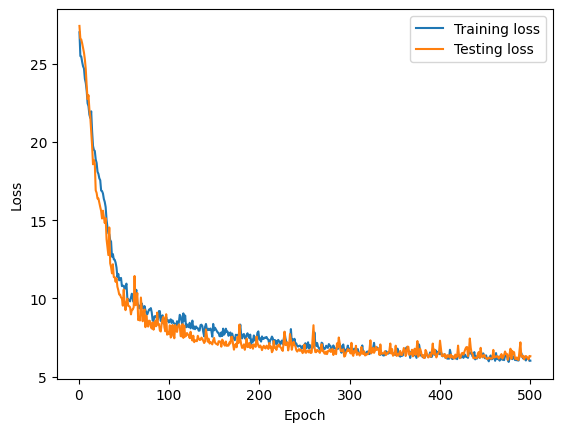

In [57]:
num_epochs = 500

plt.plot(np.linspace(1, num_epochs, num_epochs).astype(int), train_losses[:500], label="Training loss")
plt.plot(np.linspace(1, num_epochs, num_epochs).astype(int), valid_losses[:500], label="Testing loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

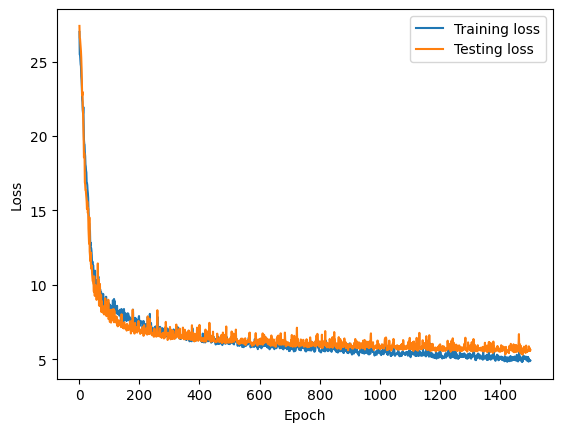

In [58]:
num_epochs = 1500

plt.plot(np.linspace(1, num_epochs, num_epochs).astype(int), train_losses[:1500], label="Training loss")
plt.plot(np.linspace(1, num_epochs, num_epochs).astype(int), valid_losses[:1500], label="Testing loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

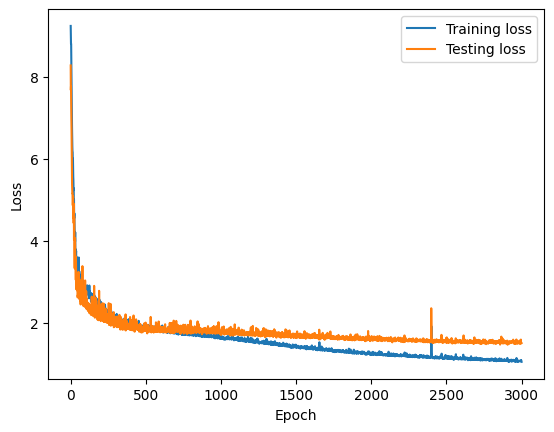

In [ ]:
num_epochs = 3000

plt.plot(np.linspace(1, num_epochs, num_epochs).astype(int), train_losses[:3000], label="Training loss")
plt.plot(np.linspace(1, num_epochs, num_epochs).astype(int), valid_losses[:3000], label="Testing loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [39]:
torch.save(model,"GAT_1.5k_2D.pth")

In [40]:
modelv2 = torch.load("GAT_1.5k_2D.pth")
modelv2.eval()

MetaNet(
  (input): MetaLayer(
    edge_model=EdgeModel(
    (edge_mlp): Sequential(
      (0): Linear(in_features=26, out_features=128, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=128, out_features=128, bias=True)
    )
  ),
    node_model=NodeModel(
    (node_mlp_1): Sequential(
      (0): Linear(in_features=139, out_features=128, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=128, out_features=128, bias=True)
    )
    (node_mlp_2): Sequential(
      (0): Linear(in_features=139, out_features=128, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=128, out_features=128, bias=True)
    )
  ),
    global_model=None
  )
  (output): MetaLayer(
    edge_model=EdgeModel(
    (edge_mlp): Sequential(
      (0): Linear(in_features=384, out_features=128, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=128, out_features=128, bias=True)
    )
  ),
    node

In [41]:
#evaluate the model on the test set
test_epoch_losses= evaluate(test_loader)
print(f"Len of Validation loss: {len(test_epoch_losses)}, Average loss: {float(np.sum(test_epoch_losses))/len(test_epoch_losses)}")
valid_losses.append(np.mean(test_epoch_losses))





Len of Validation loss: 120, Average loss: 5.395848728219668


In [42]:
(np.array(test_epoch_losses)).shape

(120,)

In [43]:
#calculate the mean squared error for the test set
print(np.mean(test_epoch_losses))
#calculate the mean absolute error for the test set
print(np.mean(np.sqrt(test_epoch_losses)))
#calculate the root mean squared error for the test set
print(np.sqrt(np.mean(test_epoch_losses)))



5.395848728219668
2.2373759529341495
2.3228966245228535


In [44]:
squared_loss = [i**2 for i in test_epoch_losses]
print(np.mean(squared_loss))
#calculate the mean absolute error for the test set
print(np.mean(np.sqrt(squared_loss)))
#calculate the root mean squared error for the test set
print(np.sqrt(np.mean(squared_loss)))

38.85881631488381
5.395848728219668
6.233684008263798


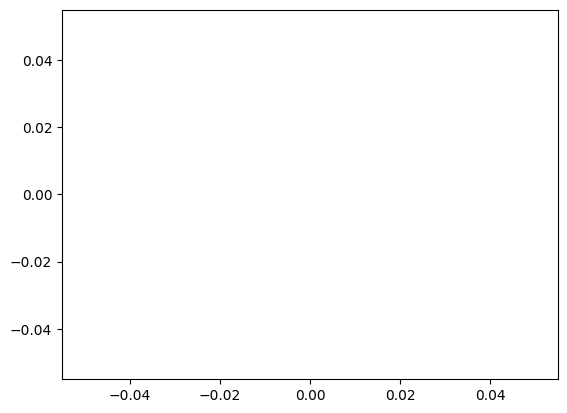

In [46]:
np.set_printoptions(suppress=True)
for data in test_loader:
    #create a 3d plot of the access points which has node_type = 0 and the stations which has node_type=1
    #and the edges between them
    fig = plt.figure()
    ax = fig.add_subplot(111)
    x = data.x[:,0].cpu().detach().numpy()
    y = data.x[:,1].cpu().detach().numpy()
    node_type = data.x[:,10].cpu().detach().numpy()
    ax.scatter(x[node_type==0], y[node_type==0], c='r', marker='o')
    ax.scatter(x[node_type==1], y[node_type==1], c='b', marker='o')
    for i in range(len(data.edge_index[0])):
        if data.x[ data.edge_index[0][i],10] == 0 and data.x[ data.edge_index[1][i],10] == 1:
            x_values = [data.x[ data.edge_index[0][i],0],data.x[ data.edge_index[1][i],0]]
            y_values = [data.x[ data.edge_index[0][i],1],data.x[ data.edge_index[1][i],1]]
            ax.plot(x_values, y_values)
    plt.show()
    break


In [ ]:
# #evaluate model and predict on the test set
# np.set_printoptions(suppress=True)
# #dont print tensor in scientific notation
# torch.set_printoptions(sci_mode=False)
# modelv2.eval()
# for data in test_loader:
#     # print(data.shape)
#     out = modelv2(data.to(device))
#     # #print the predicted values and the actual values side by side for comparison

#     print(out)
#     print(data.y)
#     break


In [ ]:
import torch
import numpy as np

# Set the model in evaluation mode
modelv2.eval()

# Initialize variables
mse = 0.0
total_samples = 0

# Iterate over the test loader batches
for data in test_loader:
    # Pass the data through the model
    out = modelv2(data.to(device))

    # Calculate squared differences
    squared_diff = torch.pow(out.view(-1) - data.y.view(-1), 2)
    # print(torch.cat((out.view(-1,1),data.y.view(-1,1)),1))

    # Accumulate the squared differences
    mse += torch.sum(squared_diff).item()

    # Update the total number of samples
    total_samples += len(data.y)

# Calculate the mean squared error
mse /= total_samples

# Calculate the root mean squared error
rmse = np.sqrt(mse)

print(f"RMSE: {rmse}")


RMSE: 1.6629234308900376
